# San Francisco Salaries

In [7]:
import pandas as pd

### Erstelle aus salaries.csv einen DataFrame

In [8]:
sal = pd.read_csv("salaries.csv", na_values=['Not Provided'])

C:\Users\nikla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


** Empfohlen: `head()` **

In [12]:
sal.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148652 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [13]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### Wie viele Observations gibt es?

In [28]:
len(sal)

148654

### Was ist das arithmetische Mittel von `BasePay`?
Lösung: `66325.44884050643`

In [15]:
sal.loc[:, "BasePay"].mean()

66325.44884050643

### Was ist der höchste Geldbetrag, der als `OvertimePay` vorhanden ist?
Lösung: `245131.88`

In [16]:
sal.loc[:, "OvertimePay"].max()

245131.88

### Welchen Job hat JOSEPH DRISCOLL? (**Nicht** Joseph Driscoll).
Lösung:
```
CAPTAIN, FIRE SUPPRESSION
```

In [32]:
sal[sal.EmployeeName == "JOSEPH DRISCOLL"].JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

### Was ist das Gesamtgehalt von JOSEPH DRISCOLL?
Lösung:
```
270324.91
```

In [30]:
sal[sal.EmployeeName == "JOSEPH DRISCOLL"].TotalPay

24    270324.91
Name: TotalPay, dtype: float64

### Wie lautet der Name der bestverdienensten Person?
Lösung: `NATHANIEL FORD`

In [31]:
sal.nlargest(1, 'TotalPay').EmployeeName

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

### Wie lautet der Name der am schlechtest bezahlten Person?
Lösung: `Joe Lopez`

In [33]:
sal.nsmallest(1, 'TotalPay').EmployeeName

148653    Joe Lopez
Name: EmployeeName, dtype: object

### Ermittle für die Jahre 2011-2014 den arithmetischen Mittelwert des `BasePay`s aller Personen.
Lösung:
```
Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
```


In [34]:
sal.groupby("Year")["BasePay"].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

### Wie viele unterschiedliche Jobs gibt es?
Lösung: `2159`

In [36]:
sal.nunique()["JobTitle"]

2159

### Welche sind die Top 5 häufigsten Jobs und wie viele gibt es davon jeweils?
Lösung:
```
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64
```


In [37]:
sal.groupby('JobTitle').size().nlargest(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
dtype: int64

### Wie viele Jobs gibt es, die 2013 nur eine Person ausübte?
Lösung: `202`

In [17]:
sal[sal['Year'] == 2013].value_counts('JobTitle')[lambda x: x==1].count()

202

### Wie viele läute haben `'chief'` (caseinsensitive) im Jobnamen?
Lösung: `627`

In [48]:
len(sal[sal.JobTitle.str.contains('chief', case=False)])

627

In [2]:
import seaborn as sns 
### Erstelle ein Histogramm 

<AxesSubplot:>

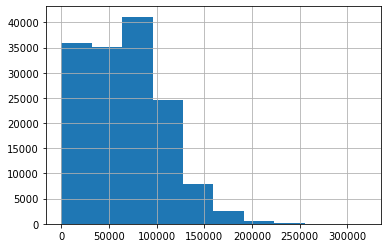

In [19]:
sal['BasePay'].hist()